# Project 1

The goal of this project is to predict the presence of heart disease. 

It was worked with two datasets: train_labels.csv and train_vlaues.csv and then they were concaneated in a same dataframe. The databases were found in: https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/page/109/

In this new preliminar database called "df", there are 15 columns, where the patient_id column is a unique and random identifier. The remaining 14 features are described in the section below.
 
- heart_disease_present: binary variable 

- slope_of_peak_exercise_st_segment (type: integer): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart

- thal (type: integer): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect (3 values)

- resting_blood_pressure (type: int): resting blood pressure

- chest_pain_type (type: int): chest pain type (4 values)

- num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy

- fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl

- resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)

- serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl

- oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
   
- sex (type: binary): 0: female, 1: male

- age (type: int): age in years

- max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)

- exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)


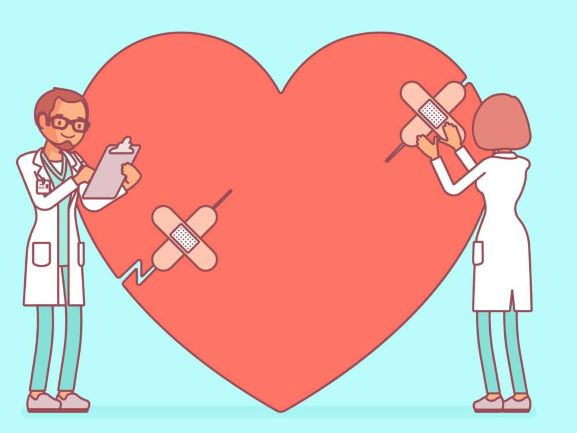


I have worked with the following Python packages on my Jupyter notebook: numpy,pandas,matplotlib.pyplot, statsmodels.api and seaborn. 

Data Analysis Steps

1. Data Preparation    
      
2. Exploratory Analysis

      1- Outliers analysis
      
      2- Qualitative variables
      
      3- Cuantitative variables
      

3. Logistic Regression




### Importing the required libraries

In [1]:
### Libraries for charts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


## Libraries for statitics 
import statsmodels.api as sm
from scipy.stats import norm ## to draw the norm curv
from scipy import stats ;from scipy.stats import chi2_contingency# to make a chi square test
import scipy as sp
sns.set()

C:\Users\Elena Peña\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Initial treatment of Data

In [2]:
heart_disease= pd.read_csv("train_labels.csv") # se tiene que llamar Heart disease
variables= pd.read_csv("train_values.csv")# se tiene que llamar variables
#data1["thal"].value_counts()

#df_EA['oldpeak_depression'].value_counts() 

In [3]:
variables["thal"]= variables["thal"].map({"normal":1, "reversible_defect":2, "fixed_defect":3}) #Replacing "thal" categorical values to numerical

In [4]:
df = pd.merge(heart_disease
              , variables, on='patient_id') ### Join the two databases


In [5]:
df.columns.values ### Renaming the column names as per our convenience

array(['patient_id', 'heart_disease_present',
       'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex',
       'age', 'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype=object)

In [6]:
df= df.rename(columns= {'patient_id': "ID", 'heart_disease_present':"HD",
       'slope_of_peak_exercise_st_segment':'SP_exercise', 'thal':"thal",
       'resting_blood_pressure':'Rblood_pressure', 'chest_pain_type':'chest_pain_type', 'num_major_vessels':'Nºmajor_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl':'fasting_blood_sugar', 'resting_ekg_results':'resting_ekg_results',
       'serum_cholesterol_mg_per_dl':'serum_cholesterol', 'oldpeak_eq_st_depression':'oldpeak_depression', 'sex':'sex',
       'age':'age', 'max_heart_rate_achieved':'max_heart_rate_achieved', 'exercise_induced_angina':'exercise_induced_angina'})
df.columns.values

array(['ID', 'HD', 'SP_exercise', 'thal', 'Rblood_pressure',
       'chest_pain_type', 'Nºmajor_vessels', 'fasting_blood_sugar',
       'resting_ekg_results', 'serum_cholesterol', 'oldpeak_depression',
       'sex', 'age', 'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype=object)

# Preprocessing 

### Missing values

In [7]:
df.isnull().values.any()# Are there missing values?

False

### Outliers


In [8]:
df_EA= df.iloc[:,1:]# It was excluded the ID variable

In [9]:
df_EA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   HD                       180 non-null    int64  
 1   SP_exercise              180 non-null    int64  
 2   thal                     180 non-null    int64  
 3   Rblood_pressure          180 non-null    int64  
 4   chest_pain_type          180 non-null    int64  
 5   Nºmajor_vessels          180 non-null    int64  
 6   fasting_blood_sugar      180 non-null    int64  
 7   resting_ekg_results      180 non-null    int64  
 8   serum_cholesterol        180 non-null    int64  
 9   oldpeak_depression       180 non-null    float64
 10  sex                      180 non-null    int64  
 11  age                      180 non-null    int64  
 12  max_heart_rate_achieved  180 non-null    int64  
 13  exercise_induced_angina  180 non-null    int64  
dtypes: float64(1), int64(13)
m

In [10]:
Q1 = df_EA.quantile(0.25)
Q3 = df_EA.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


HD                          1.00
SP_exercise                 1.00
thal                        1.00
Rblood_pressure            20.00
chest_pain_type             1.00
Nºmajor_vessels             1.00
fasting_blood_sugar         0.00
resting_ekg_results         2.00
serum_cholesterol          67.50
oldpeak_depression          1.60
sex                         1.00
age                        14.00
max_heart_rate_achieved    34.25
exercise_induced_angina     1.00
dtype: float64


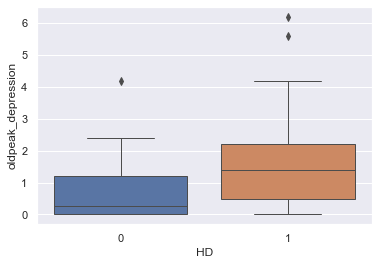

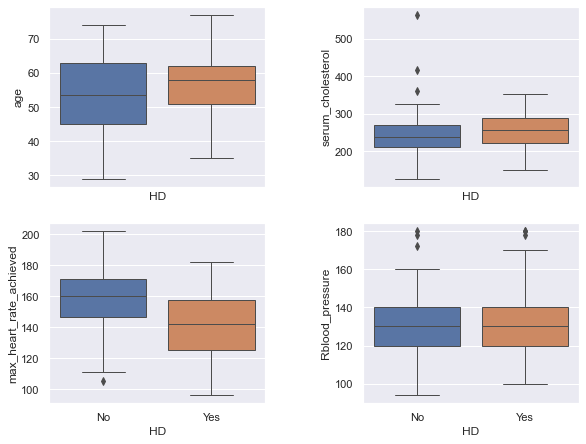

In [11]:
box_plot=sns.boxplot(x="HD", y="oldpeak_depression", data=df_EA,  linewidth=1. );

f, axes = plt.subplots( 2, 2, figsize=(9.5, 9.5), sharex= True)

sns.boxplot(x="HD", y="max_heart_rate_achieved", data=df_EA,  linewidth=1.,ax=axes[1, 0])
sns.boxplot(x="HD", y="age", data=df_EA,  linewidth=1.,ax=axes[0, 0] )
sns.boxplot(x="HD", y="Rblood_pressure", data=df_EA,  linewidth=1., ax=axes[1, 1])
sns.boxplot(x="HD", y="serum_cholesterol", data=df_EA,  linewidth=1., ax=axes[0, 1])

plt.xticks([0,1],["No", "Yes" ])
plt.subplots_adjust(wspace=0.45, bottom=0.3);


### Median Values

In [12]:
df_EA_median= df_EA.iloc[:,[0,3,8,9,11,12]]
df_EA_median_Y= df_EA_median[df_EA_median.HD==1]; df_EA_median_Y.median()
df_EA_median_N= df_EA_median[df_EA_median.HD==0]; df_EA_median_N.median()


HD                           0.00
Rblood_pressure            130.00
serum_cholesterol          237.50
oldpeak_depression           0.25
age                         53.50
max_heart_rate_achieved    160.00
dtype: float64

# Exploratory Analysis

### Qualitative Variables

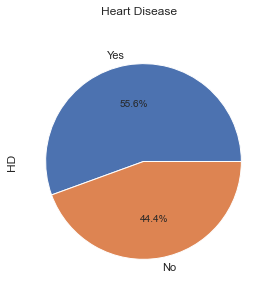

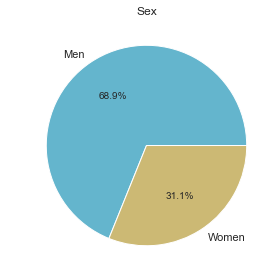

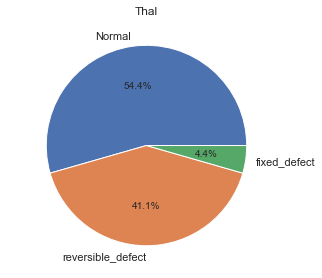

In [13]:
plot_1 = df_EA['HD'].value_counts().plot(kind='pie', autopct='%1.1f%%',  
                                            figsize=(4.5,4.5),
                                            title='Heart Disease', labels=("Yes","No"),subplots=True)                                            

fig = plt.figure()
plt.subplots_adjust(wspace=0.85, bottom=0.3)


plot = df_EA['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%',  
                                            figsize=(6, 6),
                                            title='Sex', labels=("Men","Women"),
                                            colors=("cycle"))

plot.set_ylabel(' ')

plt.subplots_adjust(wspace=0.85, bottom=0.3)



fig = plt.figure(figsize=(12,8))

plot = variables['thal'].value_counts().plot(kind='pie', autopct='%1.1f%%',  
                                            figsize=(6, 6),
                                            title='Thal', labels=("Normal","reversible_defect","fixed_defect" )
                                            )

plot.set_ylabel(' ')
plt.subplots_adjust(wspace=0.85, bottom=0.3)

## Matrix Correlation

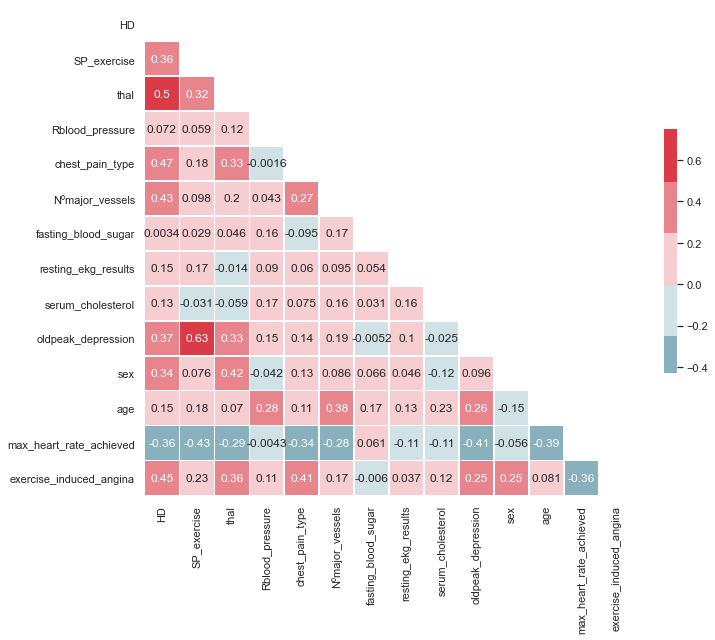

In [14]:
sns.set(style="white")
corr_spearman= df_EA.corr(method='spearman', min_periods=1)# Spearman Corrleation is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It assesses how well the relationship between two variables can be described using a monotonic function.
#corr_pearson = df_EA.corr(method='pearson', min_periods=1)

mask = np.triu(np.ones_like(corr_spearman, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=False)

sns.heatmap(corr_spearman, mask=mask, annot=True,cmap=cmap, vmax=0.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});


## Contingence tables

In [15]:
data_map1=df_EA.copy()

data_map1["chest_pain_type"]= data_map1["chest_pain_type"].map({1:"Type 1", 2:"Type 2",3:"Type  3",4:"Type  4"})

data_map1["HD"]= data_map1["HD"].map({0:"No", 1:"Yes"})

# Relatives Frequencies Heart disease and typy of chest pain

cont= pd.crosstab(index=data_map1['HD'],
            columns=data_map1['chest_pain_type'],  margins=True, margins_name="Total", rownames=["Heart disease"], colnames=["Chest pain type"]).apply(lambda r: r/len(df_EA) *100,
                               axis=0) 

result= np.round(cont, 2);result## round the values to digits

Chest pain type,Type 3,Type 4,Type 1,Type 2,Total
Heart disease,,,,,
No,24.44,12.78,5.00,13.33,55.56
Yes,7.22,32.78,2.22,2.22,44.44
Total,31.67,45.56,7.22,15.56,100.00


##### Chi-Square test

In [16]:
chi2, p, dof, expected = stats.chi2_contingency(result)
print("The p-value is " + str(np.round(p,5)) + " that it means is statistically significant.") # 
 

The p-value is 0.00095 that it means is statistically significant.


In [17]:

data_map1["thal"]= data_map1["thal"].map({1:"normal", 2:"reversible_defect",3:"fixed_defect"})


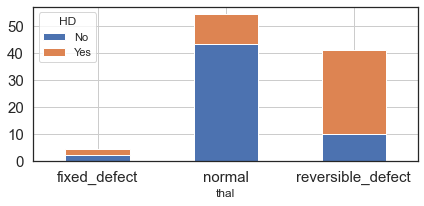

In [18]:
## bar chart - Heart Disease and Thal
cont= pd.crosstab(index=data_map1['thal'] ,
            columns=data_map1['HD'], rownames=["thal"]).apply(lambda r: r/len(data_map1) *100,
                               axis=0).plot(kind='bar', stacked= True); cont

plt.grid(True)
plt.tight_layout() 
plt.yticks(fontsize=15)

plt.xticks(rotation=360, fontsize=15);

In [19]:
## Relative Frequencies- Contingence table- Heart Disease and Thal

cont= pd.crosstab(index=data_map1['HD'] ,
            columns=data_map1['thal'], rownames=["Heart Disease"], margins=True, margins_name="Total",colnames=["Thal"]).apply(lambda r: r/len(data_map1) *100,
                               axis=0); result_1= np.round(cont, 2);result_1

Thal,fixed_defect,normal,reversible_defect,Total
Heart Disease,,,,
No,2.22,43.33,10.00,55.56
Yes,2.22,11.11,31.11,44.44
Total,4.44,54.44,41.11,100.00


##### Chi-Square test

In [20]:
chi2, p, dof, expected = stats.chi2_contingency(result_1)
 # 
print("The p-value is " + str(np.round(p,4)) + " that it means is statistically significant.") # 


The p-value is 0.0001 that it means is statistically significant.


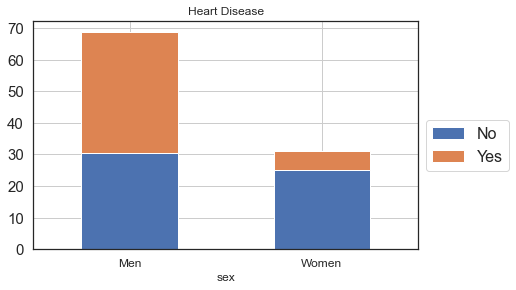

In [21]:
data_map1["sex"]= data_map1["sex"].map({1:"Men", 0:"Women"})

# # bar chart - Heart Disease and sex

contingency_table=pd.crosstab(index=data_map1['sex'],
            columns=data_map1['HD']).apply(lambda r: r/len(data_map1) *100,
                                axis=1).plot(kind='bar', stacked=True);contingency_table
plt.xticks(rotation=360, fontsize=12)

plt.grid(True)
plt.tight_layout() 
plt.yticks(fontsize=15)

plt.title("Heart Disease")
plt.legend(["No", "Yes"], bbox_to_anchor=(1, 0.6), fontsize=16);

In [22]:
# # Relative Frequencies contigence table- Heart Disease and sex

cont_table=pd.crosstab(index=data_map1['sex'],
            columns=data_map1['HD'], rownames=["Sex"], margins=True, margins_name="Total",colnames=["Heart Disease"]).apply(lambda r: r/len(data_map1) *100,
                                axis=1)

In [23]:
result_2 = np.round(cont_table, 2);result_2 

Heart Disease,No,Yes,Total
Sex,,,
Men,30.56,38.33,68.89
Women,25.00,6.11,31.11
Total,55.56,44.44,100.00


##### Chi-square test

In [24]:
chi2, p, dof, expected = stats.chi2_contingency(result_2)
print("The p-value is " + str(np.round(p,4)) + " that it means is statistically significant.") # 


The p-value is 0.0239 that it means is statistically significant.


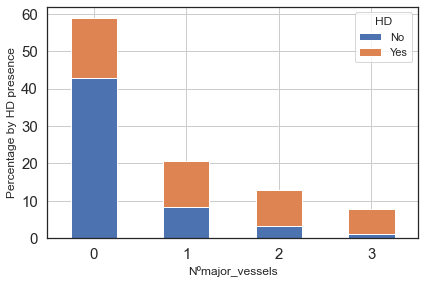

In [25]:
# # Absolute Frequencies bar chart- Heart Disease and Number of major vessels

plot = pd.crosstab(index=data_map1['Nºmajor_vessels'],
            columns=data_map1['HD'],  aggfunc= None).apply(lambda r: r/len(df_EA) *100,
                                axis=1).plot(kind='bar',  stacked=True)

#plt.xticks([0,1],["No", "Yes"])
plt.ylabel('Percentage by HD presence')

plt.grid(True)
plt.tight_layout() 
plt.yticks(fontsize=15)

plt.xticks(rotation=360, fontsize=15);

In [26]:
# # Relative Frequencies contigence table- Heart Disease and Number of major vessels

plot = pd.crosstab(index=data_map1['HD'],
            columns=data_map1['Nºmajor_vessels'], margins=True, margins_name="Total",colnames=["Nºmajor_vessels"]).apply(lambda r: r/len(data_map1) *100,
                                axis=1);result_3= np.round(plot, 2);result_3

Nºmajor_vessels,0,1,2,3,Total
HD,,,,,
No,42.78,8.33,3.33,1.11,55.56
Yes,16.11,12.22,9.44,6.67,44.44
Total,58.89,20.56,12.78,7.78,100.00


##### Chi-Square test

In [27]:
chi2, p, dof, expected = stats.chi2_contingency(result_3)
#p-value < 0,5, there are diffrences 
print("The p-value is " + str(np.round(p,4)) + " that it means is statistically significant.") # 
 

The p-value is 0.0165 that it means is statistically significant.


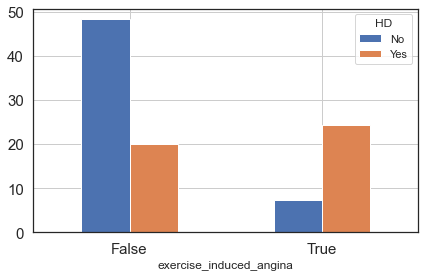

<Figure size 432x288 with 0 Axes>

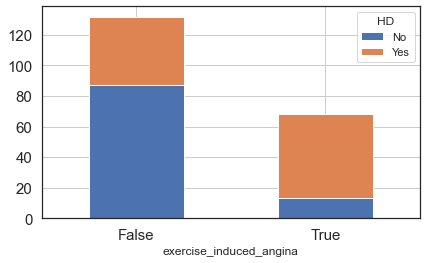

In [28]:
## bar charts- Heart disease and Induce angina 

data_map1["exercise_induced_angina"]= data_map1["exercise_induced_angina"].map({0:"False", 1:"True"})

angina = pd.crosstab(index=data_map1['exercise_induced_angina'],
            columns=data_map1['HD']).apply(lambda r: r/len(data_map1) *100,
                          axis=1).plot(kind='bar', stacked=False)
plt.xticks(rotation=360, fontsize=15)
plt.grid(True)
plt.tight_layout() 
plt.yticks(fontsize=15);


plt.show();

plt.figure();

angina_2 = pd.crosstab(index=data_map1['exercise_induced_angina'],
            columns=data_map1['HD']).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True); angina_2

plt.grid(True)
plt.tight_layout() 
plt.yticks(fontsize=15)

plt.xticks(rotation=360, fontsize=15);

In [29]:
angina = pd.crosstab(index=data_map1['exercise_induced_angina'],
            columns=data_map1['HD'],margins=True, margins_name="Total").apply(lambda r: r/len(data_map1) *100,
                          axis=1);result_4= np.round(angina, 2);result_4


HD,No,Yes,Total
exercise_induced_angina,,,
False,48.33,20.00,68.33
True,7.22,24.44,31.67
Total,55.56,44.44,100.00


##### Chi-Square test

In [30]:
chi2, p, dof, expected = stats.chi2_contingency(result_4)
print("The p-value is " + str(np.round(p,4)) + " that it means is statistically significant.") # 
 

The p-value is 0.0005 that it means is statistically significant.


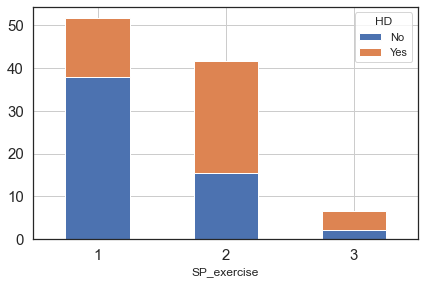

In [31]:
# # Bar chart- Heart Disease and Slope exercise

plot = pd.crosstab(index=data_map1['SP_exercise'],
            columns=data_map1['HD']).apply(lambda r: r/len(df_EA) *100,
                               axis=1).plot(kind='bar', stacked=True)
#plt.xticks([0,1],["No", "Yes"])
plt.grid(True)
plt.tight_layout() 
plt.yticks(fontsize=15)
plt.xticks(rotation=360, fontsize=15);

In [32]:
# # Relative Frequencies contigence table- Heart Disease and Slope exercise
plot = pd.crosstab(index=data_map1['HD'],
            columns= data_map1['SP_exercise'],margins=True, margins_name="Total").apply(lambda r: r/len(df_EA) *100,
                               axis=1); result_5= np.round(plot, 2);result_5

SP_exercise,1,2,3,Total
HD,,,,
No,37.78,15.56,2.22,55.56
Yes,13.89,26.11,4.44,44.44
Total,51.67,41.67,6.67,100.00


##### Chi-Square test

In [33]:
chi2, p, dof, expected = stats.chi2_contingency(result_5)
print("The p-value is " + str(np.round(p,4)) + " that it means is statistically significant.") # 


The p-value is 0.0373 that it means is statistically significant.


## Quantitative Variables 

### Distibution of each quantitative variable


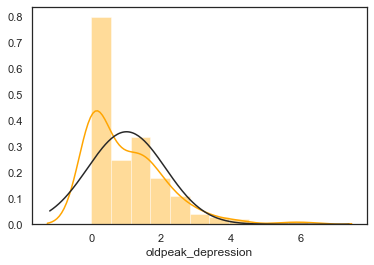

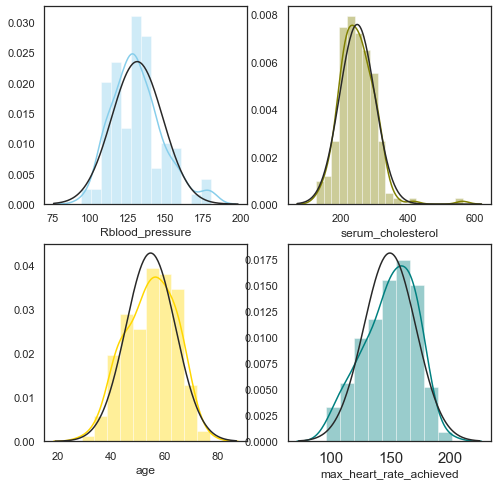

In [34]:

sns.distplot(df_EA['oldpeak_depression'], color="orange", kde= True, label= 1, fit=norm)
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=False)


plt.xticks(rotation=360, fontsize=15);
sns.distplot( df_EA["Rblood_pressure"] , color="skyblue", ax=axes[0, 0], fit=norm)
sns.distplot(df_EA["serum_cholesterol"] , color="olive", ax=axes[0, 1], fit=norm)
sns.distplot( df_EA["age"] , color="gold", ax=axes[1, 0], fit=norm)
sns.distplot( df_EA["max_heart_rate_achieved"] , color="teal", ax=axes[1, 1], fit=norm)


plt.xticks(rotation=360, fontsize=15);

#### Distibution of each quantitative variable by presence of hearth disease


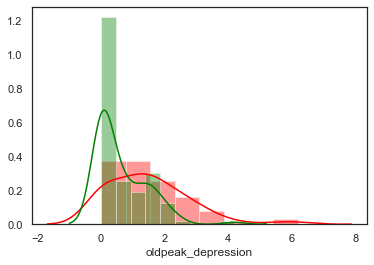

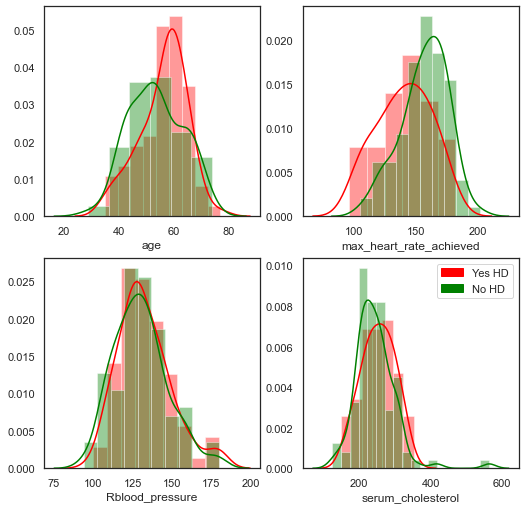

In [35]:
from scipy import stats
df_EA_hist= df_EA[df_EA.HD==1]
df_EA_hist_0= df_EA[df_EA.HD==0]

sns.distplot(df_EA_hist['oldpeak_depression'], color="red", kde= True, label= 1)
sns.distplot(df_EA_hist_0['oldpeak_depression'], color="green", kde= True, label= 0)

f, axes = plt.subplots(2, 2, figsize=(8.5, 8.5), sharex=False)
sns.distplot(df_EA_hist['Rblood_pressure'], color= "red", kde= True, label= 1,  ax=axes[1, 0] )
sns.distplot(df_EA_hist_0['Rblood_pressure'],color="green" ,kde= True, label= 0,  ax=axes[1, 0])

sns.distplot(df_EA_hist['max_heart_rate_achieved'], color="red", kde= True, label= 1,  ax=axes[0, 1])
sns.distplot(df_EA_hist_0['max_heart_rate_achieved'], color="green", kde= True, label= 0,  ax=axes[0, 1])

sns.distplot(df_EA_hist['serum_cholesterol'], color="red", kde= True, label= 1,  ax=axes[1, 1])
sns.distplot(df_EA_hist_0['serum_cholesterol'], color="green", kde= True, label= 0,  ax=axes[1, 1])

sns.distplot(df_EA_hist['age'], color="red", kde= True, label= 1,  ax=axes[0, 0])
sns.distplot(df_EA_hist_0['age'], color="green", kde= True, label= 0,  ax=axes[0, 0])


import matplotlib.patches as mpatches
Yes = mpatches.Patch(color='red', label='Yes HD')
No = mpatches.Patch(color='green', label='No HD')
plt.legend(handles=[Yes, No]);


## Skew and Curtosis

In [36]:
df_EA_Skew= df_EA_hist.iloc[:,[3,8,9,11,12]]

In [37]:
df_EA_Skew.skew() ## assymetry based on moments
## "Rblood_pressure" and #olpeak_depression" have positive assymetry
## "Serum_cholesterol", "age and "max_heart_rate_achieved" have negative assymetry

Rblood_pressure            0.790830
serum_cholesterol         -0.119503
oldpeak_depression         1.127828
age                       -0.544082
max_heart_rate_achieved   -0.148226
dtype: float64

In [38]:
df_EA_Kurt= df_EA_hist.iloc[:,[3,8,9,11,12]]
df_EA_Kurt.kurt() 
## "Rblood_pressure" and #olpeak_depression" have  lepto kurtic dome-shaped 
## "Age" have meso kurtic dome-shaped
## "Serum_cholesterol", and "max_heart_rate_achieved" have platty kurtic dome-shaped 

Rblood_pressure            0.680258
serum_cholesterol         -0.663404
oldpeak_depression         1.985602
age                        0.071592
max_heart_rate_achieved   -0.855588
dtype: float64

### Variance and desviation 

In [39]:
df_EA_var= df_EA_hist.iloc[:,[3,8,9,11,12]]
np.round(df_EA_var.var(), 3)

Rblood_pressure             287.757
serum_cholesterol          2183.762
oldpeak_depression            1.652
age                          74.291
max_heart_rate_achieved     491.127
dtype: float64

In [40]:
df_EA_dev= df_EA_hist.iloc[:,[3,8,9,11,12]]
np.round(df_EA_dev.std(), 3)

Rblood_pressure            16.963
serum_cholesterol          46.731
oldpeak_depression          1.285
age                         8.619
max_heart_rate_achieved    22.161
dtype: float64

## Data Preparation  for  Logistic Regression 


In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
X = variables[['slope_of_peak_exercise_st_segment','thal',"resting_blood_pressure", "chest_pain_type", "num_major_vessels", "fasting_blood_sugar_gt_120_mg_per_dl","resting_ekg_results","oldpeak_eq_st_depression","sex","age","serum_cholesterol_mg_per_dl","max_heart_rate_achieved", "exercise_induced_angina" ]]
y = heart_disease['heart_disease_present']


## LOGISTIC REGRESSION

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

In regression analysis, logistic regression is estimating the parameters of a of binary regression. Mathematically, a binary logistic model has a dependent variable with two possible values, such as presence of disease/not presence of disease which is represented by an indicator variable, where the two values are labeled "0" and "1". 

In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1"(presence of disease) is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name. The unit of measurement for the log-odds scale is called a logit, from logistic unit.

Analogous models with a different sigmoid function instead of the logistic function can also be used, such as the probit model; the defining characteristic of the logistic model is that increasing one of the independent variables multiplicatively scales the odds of the given outcome at a constant rate, with each independent variable having its own parameter; for a binary dependent variable this generalizes the odds ratio. 
 
 (Wikipedia)

In [43]:
x    = sm.add_constant(X)
reg_logit = sm.Logit(y,x)
results_log = reg_logit.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.359084
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     heart_disease_present   No. Observations:                  180
Model:                             Logit   Df Residuals:                      166
Method:                              MLE   Df Model:                           13
Date:                   Thu, 04 Feb 2021   Pseudo R-squ.:                  0.4773
Time:                           11:08:49   Log-Likelihood:                -64.635
converged:                          True   LL-Null:                       -123.65
Covariance Type:               nonrobust   LLR p-value:                 4.917e-19
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -7.1244      3.616     -1.970      0.049     -14.212      -0.037
slope_of_peak_exercise_st_segment        0.5741      0.475      1.209      0.227      -0.357       1.505
thal                                     0.7855      0.419      1.873      0.061      -0.036       1.608
resting_blood_pressure                   0.0071      0.015      0.480      0.631      -0.022       0.036
chest_pain_type                          0.6897      0.252      2.742      0.006       0.197       1.183
num_major_vessels                        1.1525      0.316      3.643      0.000       0.532       1.772
fasting_blood_sugar_gt_120_mg_per_dl    -0.7558      0.693     -1.090      0.276      -2.115       0.603
resting_ekg_results                      0.2449      0.233      1.049      0.294      -0.213       0.702
oldpeak_eq_st_depression                 0.4513      0.290      1.559      0.119      -0.116       1.019
sex                                      1.5540      0.643      2.415      0.016       0.293       2.815
age                                     -0.0241      0.030     -0.813      0.416      -0.082       0.034
serum_cholesterol_mg_per_dl              0.0059      0.004      1.334      0.182      -0.003       0.014
max_heart_rate_achieved                 -0.0088      0.013     -0.672      0.502      -0.034       0.017
exercise_induced_angina                  1.2734      0.516      2.469      0.014       0.263       2.284
========================================================================================================
"""

The coefficient table showed that type of chest pain, 
number of major vessels, sex, exercise induced angina have significant influence (p-values < 0.05) on hearth disease.

The coefficients are in log-odds terms. The interpretation of the model coefficients could be as follows:
Each one-unit change in type of chest pain will increase the log odds of having heart disease by 0.69, and its p-value indicates that it is significant in determining heart disease.

Similarly, with each unit increase in number of major vessels increases the log odds of having heart disease by 1.15  and p-value is significant too.

Each one-unit change in sex will increase the log odds of having heart disease by 1.55, and its p-value indicates that it is significant in determining heart disease.

And each one-unit change in exercise induced angina will increase the log odds of having heart disease by 1.27, and its p-value indicates that it is significant in determining heart disease

## The OODS ratio

The odds ratio represents the constant effect of a predictor X, on the likelihood that one outcome will occur.

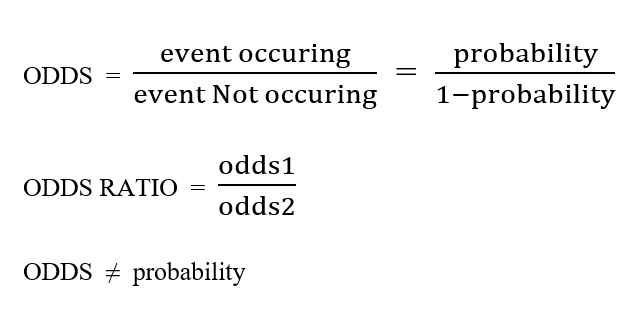


In [60]:

# odds ratios and 95% CI

params = np.round(results_log.params,10)
conf = results_log.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'Odds Ratio']
np.exp(conf)

,2.5%,97.5%,Odds Ratio
const,6.727880e-07,0.963761,0.000805
slope_of_peak_exercise_st_segment,7.000478e-01,4.503219,1.775519
thal,9.641792e-01,4.990546,2.193577
resting_blood_pressure,9.783163e-01,1.036812,1.007140
chest_pain_type,1.217339e+00,3.263134,1.993073
num_major_vessels,1.703140e+00,5.885521,3.166048
fasting_blood_sugar_gt_120_mg_per_dl,1.206562e-01,1.827911,0.469626
resting_ekg_results,8.085148e-01,2.018436,1.277472
oldpeak_eq_st_depression,8.903412e-01,2.769533,1.570296
sex,1.340406e+00,16.694751,4.730511


One can compute the odds ratio by taking exponent of the estimated coefficients. 

In the above ODDS ratio table, you can observe that chest_pain_type has an ODDS Ratio of 1.99, which indicates that one unit increase in chest_pain_type label increases the odds of having heart disease by 1.99 times.

Then, num_major_vessels has an ODDS Ratio of 3.166, which indicates that one unit increase in num_major_vessels label increases the odds of having heart disease by 3.166 times.

The sex variable has an ODDS Ratio of 4.73, which indicates that one unit increase in sex label increases the odds of having heart disease by 4.73 times.

And finally, the exercise_induced_angina variable has an ODDS Ratio of 3.57, which indicates that one unit increase in sex label increases the odds of having heart disease by 3.57 times.


### Let's see how accurate is the model

In [47]:
## Logistic values

# This is a method to change the formatting of np arrays
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
# Should you want to go back to the default formatting, uncomment and execute the line below
#np.set_printoptions(formatter=None)
results_log.predict()


array([0.10, 0.05, 0.96, 0.30, 0.72, 0.08, 0.89, 0.99, 0.99, 0.05, 0.38,
       0.15, 0.11, 0.35, 0.63, 0.88, 0.03, 0.89, 0.06, 0.10, 0.11, 0.84,
       0.20, 0.79, 0.06, 0.07, 0.19, 0.01, 0.39, 0.09, 0.39, 0.93, 0.92,
       0.19, 0.78, 0.17, 0.12, 0.02, 0.14, 0.82, 0.31, 0.02, 0.03, 0.12,
       0.03, 0.11, 0.25, 0.05, 0.71, 0.01, 0.99, 0.54, 0.99, 0.91, 0.07,
       0.26, 0.97, 0.99, 0.06, 0.38, 0.49, 0.60, 0.93, 0.01, 0.05, 0.81,
       0.99, 0.41, 0.05, 0.96, 0.04, 0.14, 0.10, 0.02, 0.72, 0.77, 0.04,
       0.98, 0.99, 0.86, 0.22, 0.79, 0.28, 0.99, 0.04, 0.83, 0.11, 0.72,
       0.09, 0.04, 0.02, 0.97, 0.01, 0.95, 0.02, 0.44, 0.98, 0.09, 0.03,
       0.01, 0.21, 0.06, 0.95, 0.26, 0.06, 0.70, 0.38, 0.97, 0.46, 0.62,
       0.92, 0.01, 1.00, 0.71, 0.08, 0.05, 0.34, 0.32, 0.97, 0.80, 0.13,
       0.01, 0.58, 0.65, 0.99, 0.08, 0.19, 0.42, 0.90, 0.97, 0.62, 0.14,
       0.03, 0.90, 0.87, 0.20, 0.93, 0.29, 0.13, 0.05, 0.99, 0.17, 0.10,
       0.91, 1.00, 0.05, 0.23, 0.53, 0.08, 0.65, 0.

In [48]:
## Train values
np.array(variables[['slope_of_peak_exercise_st_segment','thal',"resting_blood_pressure", "chest_pain_type", "num_major_vessels", "fasting_blood_sugar_gt_120_mg_per_dl","resting_ekg_results","oldpeak_eq_st_depression","sex","age","serum_cholesterol_mg_per_dl","max_heart_rate_achieved", "exercise_induced_angina" ]])

array([[1.00, 1.00, 128.00, ..., 308.00, 170.00, 0.00],
       [2.00, 1.00, 110.00, ..., 214.00, 158.00, 0.00],
       [1.00, 1.00, 125.00, ..., 304.00, 162.00, 1.00],
       ...,
       [2.00, 2.00, 125.00, ..., 309.00, 131.00, 1.00],
       [1.00, 1.00, 124.00, ..., 255.00, 175.00, 0.00],
       [1.00, 1.00, 160.00, ..., 201.00, 163.00, 0.00]])

In [49]:
# Some neat formatting to read the table (better when seeing it for the first time)
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'}); cm_df


,Predicted 0,Predicted 1
Actual 0,89.0,11.0
Actual 1,14.0,66.0


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Text(0.5, 257.44, 'Predicted label')

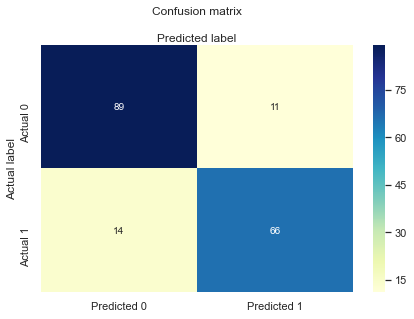

In [51]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm_df), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [52]:
# Create an array (so it is easier to calculate the accuracy)
cm = np.array(cm_df)

# Calculate the accuracy of the model

accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
np.round(accuracy_train,4)
print("The accuracy of the model is " + str(np.round(accuracy_train,4))+ "." ) # 
 

The accuracy of the model is 0.8611.


In [53]:
# https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

In [54]:
precision_train = (cm[1,1]/(cm[1,1]+cm[0,1]))
np.round(precision_train,4)

print("The precision of the model is " + str(np.round(precision_train,4))+ ". Precision talks about how precise/accurate your model is out of those predicted positive ( Predicted 1), how many of them are actual positive." )

The precision of the model is 0.8571. Precision talks about how precise/accurate your model is out of those predicted positive ( Predicted 1), how many of them are actual positive.


In [55]:
recall_train = (cm[1,1]/(cm[1,1]+cm[1,0]))
np.round(recall_train,3)
print("The recall of the model is " + str(np.round(recall_train,4))+ ". If there are patients who have hearth disease in the test set, the Logistic Regression model can identify it 82% of the time." )

The recall of the model is 0.825. If there are patients who have hearth disease in the test set, the Logistic Regression model can identify it 82% of the time.


In [56]:
##F1

F1_train= 2*(precision_train*recall_train)/(precision_train+recall_train);np.round(F1_train, 3)

print("The F- score of the model is " + str(np.round(F1_train,4))+ ". The F1 score is the harmonic mean of the precision and recall. The highest possible value of an F-score is 1, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero." ) # 

The F- score of the model is 0.8408. The F1 score is the harmonic mean of the precision and recall. The highest possible value of an F-score is 1, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero.


In [57]:
#https://databasetown.com/logistic-regression-python-explained-using-practical-example/
#https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
#https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/